# Step 01: Import Data and Check Basic Information

In [2]:
import pandas as pd

In [3]:
# Load the dataset
data = pd.read_csv('Instagram-Reach.csv')
data.head()

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532


In [4]:
# Clean the column names
data.columns = data.columns.str.strip().str.lower()
data.head()

,date,instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532


In [5]:
# Check for null values
null_values = data.isnull().sum()

In [6]:
# Column information
column_info = data.info()

<class 'pandas.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   date             365 non-null    str  
 1   instagram reach  365 non-null    int64
dtypes: int64(1), str(1)
memory usage: 5.8 KB


In [10]:
# Descriptive statistics
descriptive_stats = data.describe()

In [34]:
# Display results
print("Null Values:\n", null_values)

Null Values:
 date               0
instagram reach    0
dtype: int64


In [37]:
print("Column Info:", column_info)

Column Info: None


In [35]:
print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
        instagram reach
count       365.000000
mean      50474.712329
std       30051.787552
min        7620.000000
25%       25070.000000
50%       43987.000000
75%       68331.000000
max      161998.000000


# Step 2: Convert Date Column

In [14]:
# Convert the Date column to datetime datatype
data['date'] = pd.to_datetime(data['date'])
data.head()

,date,instagram reach
0,2022-04-01,7620
1,2022-04-02,12859
2,2022-04-03,16008
3,2022-04-04,24349
4,2022-04-05,20532


# Step 3: Analyze the Trend

In [16]:
import matplotlib.pyplot as plt

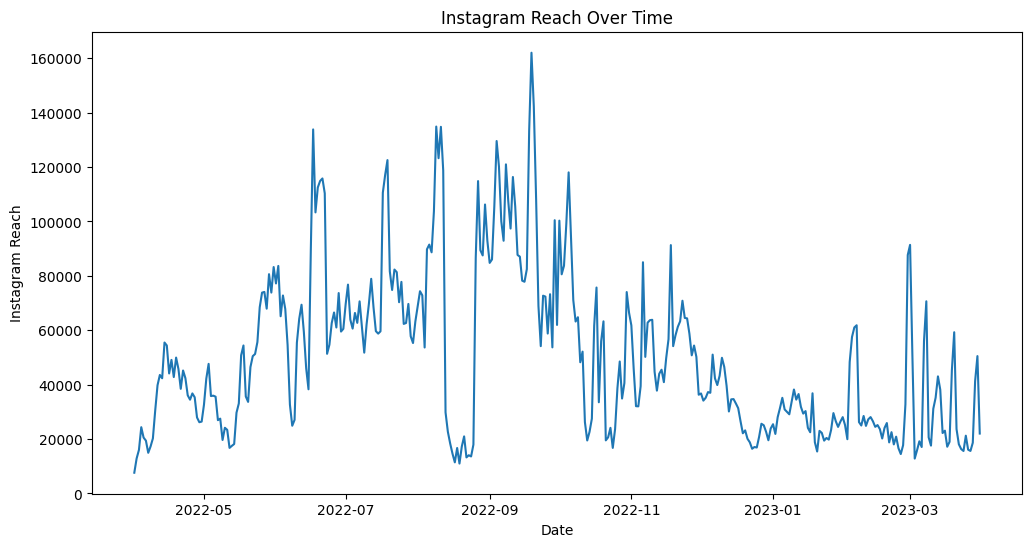

In [17]:
# Line chart of Instagram reach over time
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['instagram reach'])
plt.title('Instagram Reach Over Time')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.show()

# Step 4: Daily Analysis

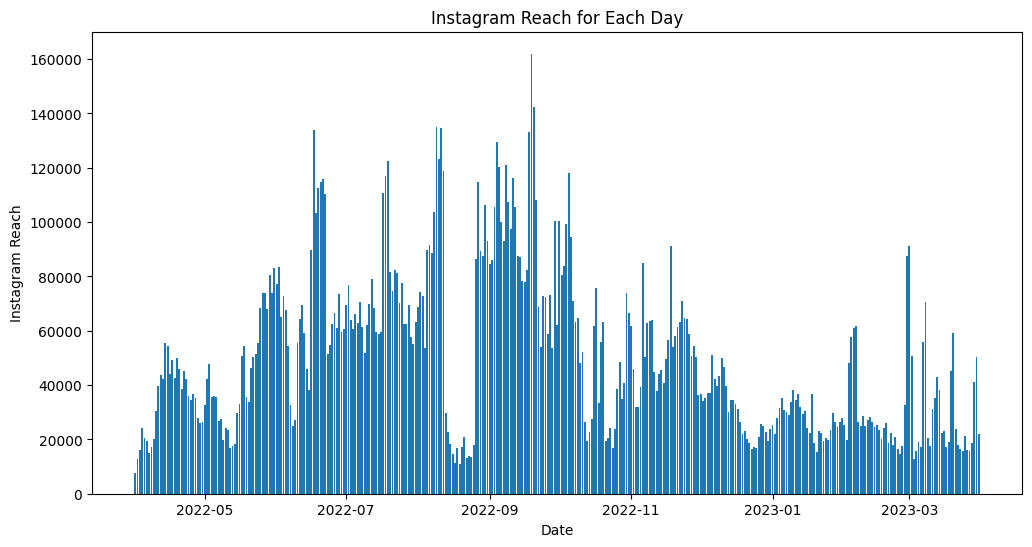

In [18]:
# Bar chart of Instagram reach for each day
plt.figure(figsize=(12, 6))
plt.bar(data['date'], data['instagram reach'])
plt.title('Instagram Reach for Each Day')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.show()

# Step 5: Distribution Analysis

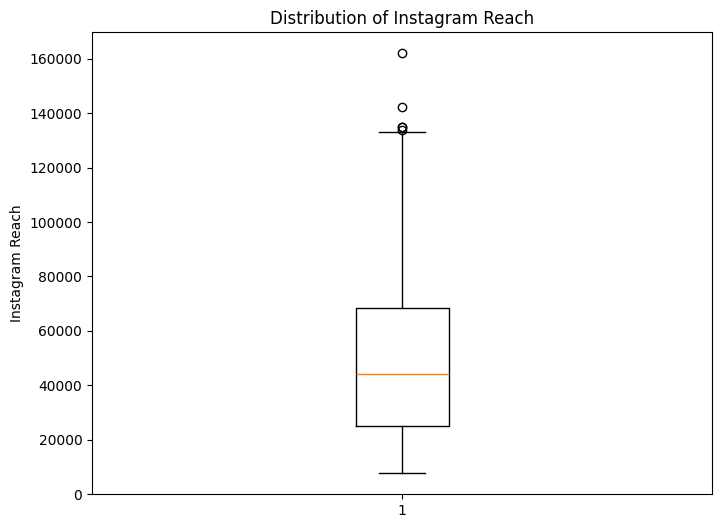

In [19]:
# Box plot of Instagram reach distribution
plt.figure(figsize=(8, 6))
plt.boxplot(data['instagram reach'])
plt.title('Distribution of Instagram Reach')
plt.ylabel('Instagram Reach')
plt.show()

# Step 6: Day of the Week Analysis

In [20]:
# Create a day column
data['day'] = data['date'].dt.day_name()

In [21]:
# Analyze reach based on days of the week
day_analysis = data.groupby('day')['instagram reach'].agg(['mean', 'median', 'std'])

In [22]:
# Display results
print("\nDay Analysis:\n", day_analysis)


Day Analysis:
                    mean   median           std
day                                           
Friday     46666.849057  35574.0  29856.943036
Monday     52621.692308  46853.0  32296.071347
Saturday   47374.750000  40012.0  27667.043634
Sunday     53114.173077  47797.0  30906.162384
Thursday   48570.923077  39150.0  28623.220625
Tuesday    54030.557692  48786.0  32503.726482
Wednesday  51017.269231  42320.5  29047.869685


# Step 7: Visualization for Day of the Week

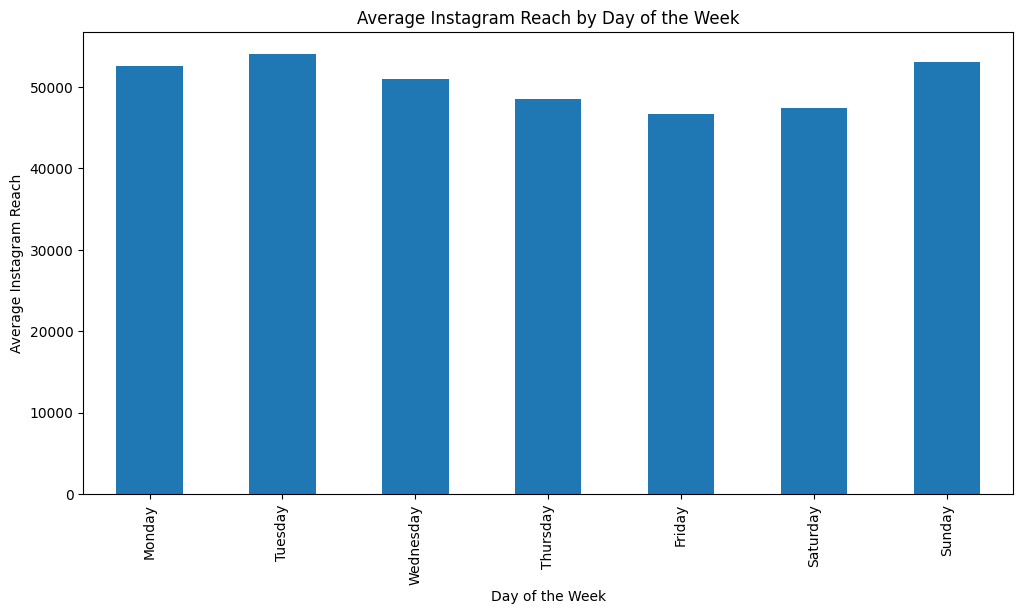

In [23]:
# Bar chart for reach on each day of the week
plt.figure(figsize=(12, 6))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_means = data.groupby('day')['instagram reach'].mean().reindex(day_order)
day_means.plot(kind='bar')
plt.title('Average Instagram Reach by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Instagram Reach')
plt.show()

# Step 8: Trend and Seasonal Patterns

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

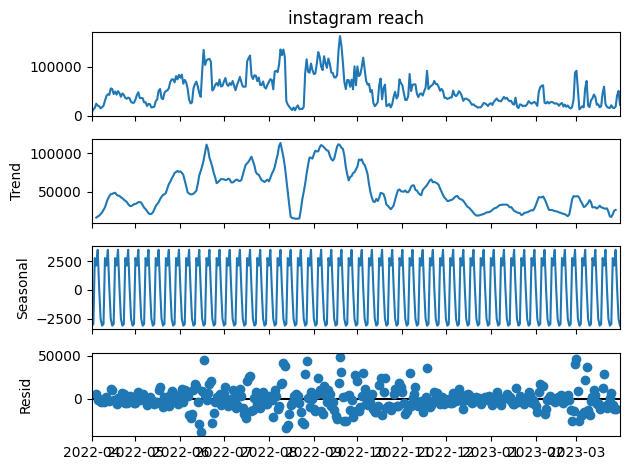

In [26]:
# Decompose the time series
decomposition = seasonal_decompose(data.set_index('date')['instagram reach'], model='additive')
decomposition.plot()
plt.show()

# Step 9: SARIMA Model for Forecasting

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

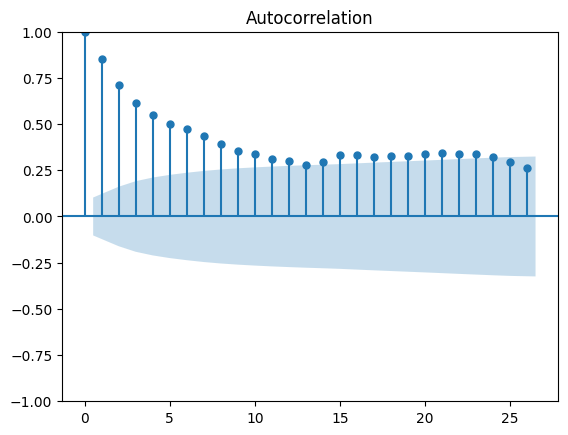

In [28]:
# Plot ACF and PACF
plot_acf(data['instagram reach'])
plt.show()

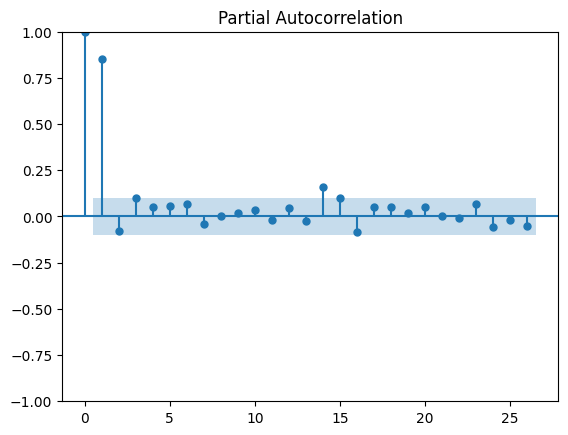

In [29]:
plot_pacf(data['instagram reach'])
plt.show()

In [30]:
# Define SARIMA model (example parameters, need to be tuned)
model = SARIMAX(data['instagram reach'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Step 10: Predictions

In [38]:
# Forecasting
forecast = results.get_forecast(steps=30)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

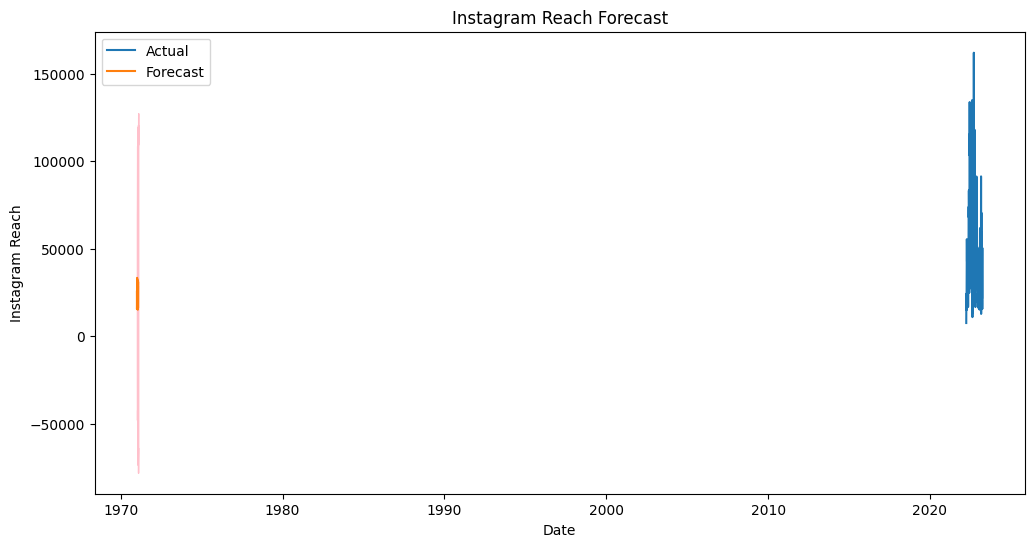

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['instagram reach'], label='Actual')
plt.plot(forecast_values.index, forecast_values, label='Forecast')
plt.fill_between(forecast_values.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink')
plt.title('Instagram Reach Forecast')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.legend()
plt.show()